In [ ]:
import torch
import torchvision
import torchvision.transforms.v2 as transforms
from sklearn.metrics import confusion_matrix
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from cnn import *
from ffn import *
import time
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

'''
In this file you will write end-to-end code to train two neural networks to categorize fashion-mnist data,
one with a feedforward architecture and the other with a convolutional architecture. You will also write code to
evaluate the models and generate plots.
'''

'''
PART 1:
Preprocess the fashion mnist dataset and determine a good batch size for the dataset.
Anything that works is accepted. Please do not change the transforms given below - the autograder assumes these.
'''
transform = transforms.Compose([                            # Use transforms to convert images to tensors and normalize them
    transforms.ToTensor(),                                  # convert images to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])             # Common method for grayscale images
])

# Constants
OUTPUT_DIM = 10
LEARNING_RATE = 0.001
NUM_EPOCHS = 5
batch_size = 64 # 32–128

'''
PART 2:
Load the dataset. Make sure to utilize the transform and batch_size from the last section.
'''
trainset = torchvision.datasets.FashionMNIST(root="data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root="data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

'''
PART 3:
Complete the model defintion classes in ffn.py and cnn.py. We instantiate the models below.
'''
feedforward_net = FF_Net()
conv_net = Conv_Net()

'''
PART 4:
Choose a good loss function and optimizer - you can use the same loss for both networks.
'''
criterion = nn.CrossEntropyLoss()

optimizer_ffn = optim.Adam(feedforward_net.parameters(), lr=LEARNING_RATE)
optimizer_cnn = optim.Adam(conv_net.parameters(), lr=LEARNING_RATE)

'''
PART 5:
Train both your models, one at a time! (You can train them simultaneously if you have a powerful enough computer,
and are using the same number of epochs, but it is not recommended for this assignment.)
'''
num_epochs_ffn = NUM_EPOCHS

ffn_loss = []
ffn_time = []

# start a timer for ffn training
start_time = time.time() 

for epoch in range(num_epochs_ffn):  # loop over the dataset multiple times
    running_loss_ffn = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Flatten inputs for ffn
        ''' flattening within FF_Net.forward() '''

        # zero the parameter gradients
        optimizer_ffn.zero_grad()

        # forward + backward + optimize
        outputs = feedforward_net(inputs)  # forward pass happens here
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_ffn.step()
        running_loss_ffn += loss.item()

    print(f"Training loss: {running_loss_ffn}")
    
    # add loss data for graph
    ffn_loss.append(running_loss_ffn)
    elapsed_time = time.time() - start_time
    ffn_time.append(elapsed_time)

print('Finished Training')

torch.save(feedforward_net.state_dict(), 'ffn.pth')  # Saves model file (upload with submission)


num_epochs_cnn = NUM_EPOCHS

cnn_loss = []
cnn_time = []

# start a timer for cnn training
start_time = time.time() 

for epoch in range(num_epochs_cnn):  # loop over the dataset multiple times
    running_loss_cnn = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_cnn.zero_grad()

        # forward + backward + optimize
        outputs = conv_net(inputs) # forward pass happens here
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_cnn.step()
        running_loss_cnn += loss.item()


    print(f"Training loss: {running_loss_cnn}")

    # add loss data for graph
    cnn_loss.append(running_loss_cnn)
    elapsed_time = time.time() - start_time
    cnn_time.append(elapsed_time)


print('Finished Training')

torch.save(conv_net.state_dict(), 'cnn.pth')  # Saves model file (upload with submission)


'''
PART 6:
Evalute your models! Accuracy should be greater or equal to 80% for both models.

Code to load saved weights commented out below - may be useful for debugging.
'''

# feedforward_net.load_state_dict(torch.load('ffn.pth'))
# conv_net.load_state_dict(torch.load('cnn.pth'))

/Users/griffinmichalak/Desktop/code/fall25/intro-ai/PA3-1/venv/lib/python3.13/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Training loss: 452.4794841706753
Training loss: 342.92852745205164
Training loss: 308.0081552490592
Training loss: 280.50764591246843
Training loss: 265.1603641062975
Finished Training
Training loss: 465.95246517658234
Training loss: 286.90628107637167
Training loss: 241.6563551798463
Training loss: 213.873694896698
Training loss: 190.41064243763685
Finished Training


'\nPART 6:\nEvalute your models! Accuracy should be greater or equal to 80% for both models.\n\nCode to load saved weights commented out below - may be useful for debugging.\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def display_image(img, prediction, label):
    image_np = img.squeeze().numpy()
    plt.imshow(image_np, cmap='gray')
    plt.title(f"Prediction: {class_names[prediction]} | True Label: {class_names[label]}")
    plt.axis('off')
    plt.show()

Accuracy for feedforward network:  0.865
Accuracy for convolutional network:  0.9075
(CNN) Image classified correctly


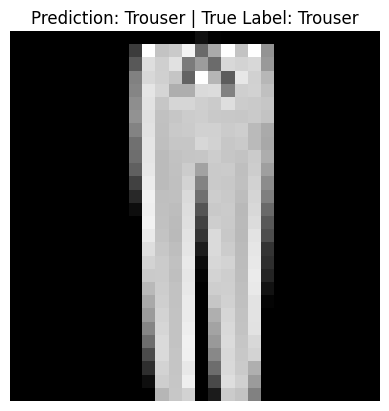

(CNN) Image classified incorrectly


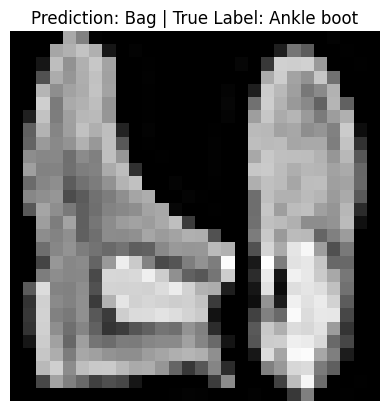

(FFN) Image classified correctly


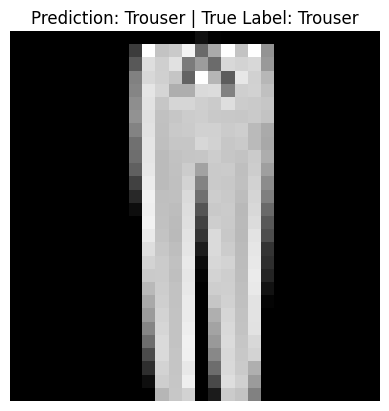

(FFN) Image classified incorrectly


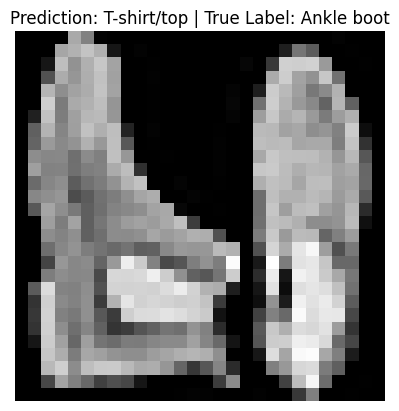

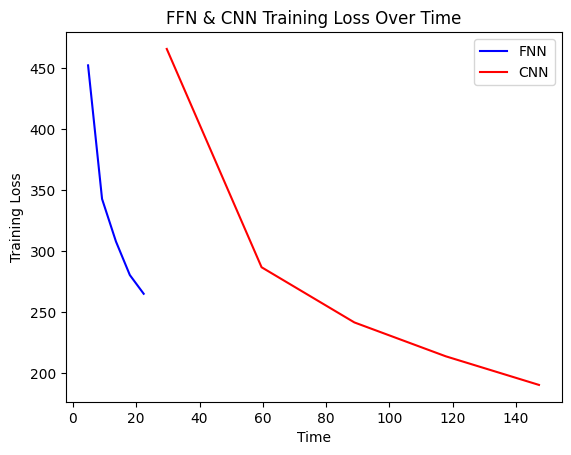

Total parameters in FFN: 535818
Total parameters in CNN: 178346


'\nPART 8:\nCompare the performance and characteristics of FFN and CNN models.\n'

In [ ]:
correct_ffn = 0
total_ffn = 0

correct_cnn = 0
total_cnn = 0

ffn_correct_ex = None
cnn_correct_ex = None
ffn_incorrect_ex = None
cnn_incorrect_ex = None

cnn_true = []
cnn_pred = []
ffn_true = []
ffn_pred = []

with torch.no_grad():           # since we're not training, we don't need to calculate the gradients for our outputs
    for data in testloader:
        images, labels = data
        # cnn
        outputs_cnn = conv_net(images)
        _, predictions = torch.max(outputs_cnn, 1)
        # collect the correct predictions for each class
        for image, label, prediction in zip(images, labels, predictions):
            # add data for confusion matrix
            cnn_true.append(label.item())
            cnn_pred.append(prediction.item())
            if label == prediction:
                correct_cnn = correct_cnn + 1
                cnn_correct_ex = [image, prediction, label]
            else:
                cnn_incorrect_ex = [image, prediction, label]
            total_cnn = total_cnn + 1

        # ffn
        outputs_ffn = feedforward_net(images)
        _, predictions = torch.max(outputs_ffn, 1)
        # collect the correct predictions for each class
        for image, label, prediction in zip(images, labels, predictions):
            # add data for confusion matrix
            ffn_true.append(label)
            ffn_pred.append(prediction)
            if label == prediction:
                correct_ffn = correct_ffn + 1
                ffn_correct_ex = [image, prediction, label]
            else:
                ffn_incorrect_ex = [image, prediction, label]
            total_ffn = total_ffn + 1


print('Accuracy for feedforward network: ', correct_ffn/total_ffn)
print('Accuracy for convolutional network: ', correct_cnn/total_cnn)

'''
PART 7:
Check the instructions PDF. You need to generate some plots. 
'''
# code
print("(CNN) Image classified correctly")
display_image(cnn_correct_ex[0], cnn_correct_ex[1], cnn_correct_ex[2])

print("(CNN) Image classified incorrectly")
display_image(cnn_incorrect_ex[0], cnn_incorrect_ex[1], cnn_incorrect_ex[2])

print("(FFN) Image classified correctly")
display_image(ffn_correct_ex[0], ffn_correct_ex[1], ffn_correct_ex[2])

print("(FFN) Image classified incorrectly")
display_image(ffn_incorrect_ex[0], ffn_incorrect_ex[1], ffn_incorrect_ex[2])

'''
For each neural network, submit one plot showing your training loss over time.
'''
ffn_loss = np.array(ffn_loss)
ffn_time = np.array(ffn_time)

cnn_loss = np.array(cnn_loss)
cnn_time = np.array(cnn_time)

plt.plot(ffn_time, ffn_loss, label='FNN', color='blue')
plt.plot(cnn_time, cnn_loss, label='CNN', color='red')
plt.title("FFN & CNN Training Loss Over Time")
plt.xlabel("Time")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

# For each neural network, submit its total number of parameters.
# inspired by https://www.geeksforgeeks.org/deep-learning/check-the-total-number-of-parameters-in-a-pytorch-model/#:~:text=Step%203%3A%20Summing%20Up%20the%20Parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Total parameters in FFN:", count_parameters(feedforward_net))
print("Total parameters in CNN:", count_parameters(conv_net))

''' For each neural network, submit a confusion matrix plot on the test data. Please
include clear labels indicating predicted and true classes.'''

# Compute confusion matrices
cnn_cm = confusion_matrix(cnn_true, cnn_pred)
ffn_cm = confusion_matrix(ffn_true, ffn_pred)

# Plot CNN confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('CNN Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# Plot FFN confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(ffn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('FFN Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


'''
PART 8:
Compare the performance and characteristics of FFN and CNN models.
'''
# code